# Script 1: display spectrum library

In [1]:
from PyAstronomy import pyasl
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline

Reading spectra module.

In [7]:
def readSpec(filename, path):
    
    sp = fits.open(path + filename)
    header = sp[0].header
      
    tf = sp[0].data
    tf = tf.flatten()
 
    wvl, flx = pyasl.read1dFitsSpec(path + filename)
 
    sp.close()

    date_obs = header['DATE-obs']

    return header, wvl, flx, date_obs, tf   


Saving spectra module.

In [3]:
def saveSpectrum(filename, header, wavelength, flux, date_obs):
    
    answer = input("Save spectra " + filename + "(y/N)?")
    if answer == "y" or answer == "Y":
    
        header['CRVAL1'] = wavelength[0]
        header['DATE'] = date_obs
        hdu = fits.PrimaryHDU(flux, header)
        hdu.writeto(filename, overwrite=True)  
   

Plotting spectra module.

In [4]:
def plotSpectrum(wavelength, flux, legend):

    fig= plt.figure(figsize=(15,5))  #el mejor: 15,5 pero 6,4 puede usarse para tamaño pequeño
    axes= fig.add_axes([0.1,0.1,0.8,0.8])
    axes.plot(wavelength, flux)
    plt.xlabel(legend)
    plt.ylabel('flux')
    plt.show()

This module calculares spectrum resolution.

In [5]:
def resolution(wavelength):
    
    waveini = wavelength[0]
    waveend = wavelength[-1]
    res = np.abs(waveini - waveend)/len(wavelength)
    print("Waveini: " + str(waveini))
    print("Waveend: " + str(waveend))
    print("Resolution calculated: " + str(res) + " A")
    print("Resolution header: " + str(header['CDELT1']) + " A")
    print("Dimension array: " + str(len(wavelength))) 
    
    return res
    

### Script core.
Define variables.
Read observational spectra.

Spectra ref25000_rw_200.fits
2004-03-11T09:10:05
Waveini: 3900.0
Waveend: 4999.97
Resolution calculated: 0.009999909089256171 A
Resolution header: 0.01 A
Dimension array: 109998


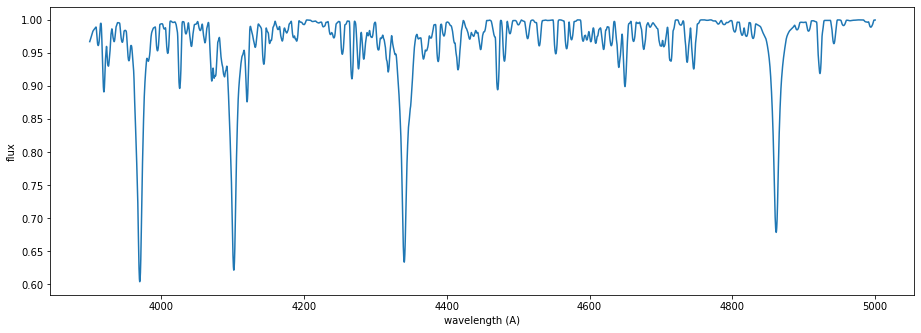

Spectra ref25000_rw_300.fits
2004-03-11T09:10:05
Waveini: 3900.0
Waveend: 4999.97
Resolution calculated: 0.009999909089256171 A
Resolution header: 0.01 A
Dimension array: 109998


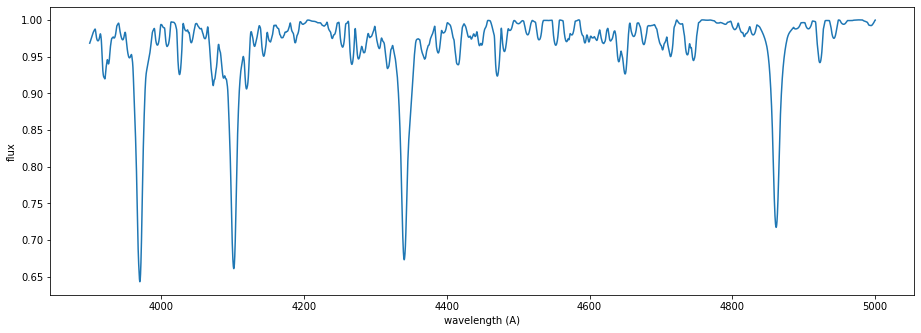

Spectra ref25000_rw_200_deg.fits
2004-03-11T09:10:05
Waveini: 3900.0
Waveend: 4999.97
Resolution calculated: 0.009999909089256171 A
Resolution header: 0.01 A
Dimension array: 109998


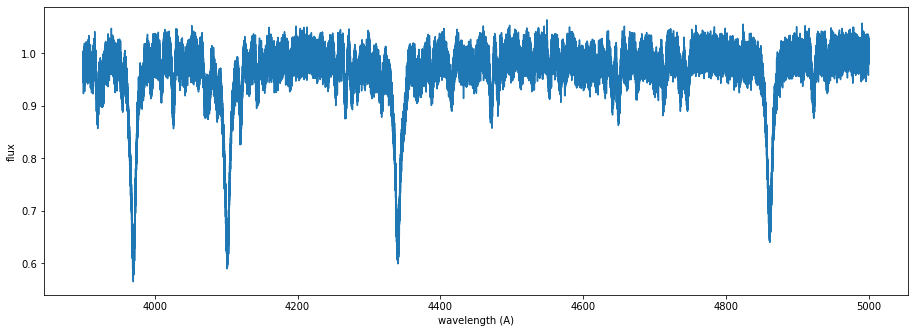

Spectra FIAd200138_step011_merge_r_n.fits
2017-04-21T05:55:09
Waveini: 3899.991240796243
Waveend: 4999.963079417474
Resolution calculated: 0.025814269522452672 A
Resolution header: 0.025814875349008 A
Dimension array: 42611


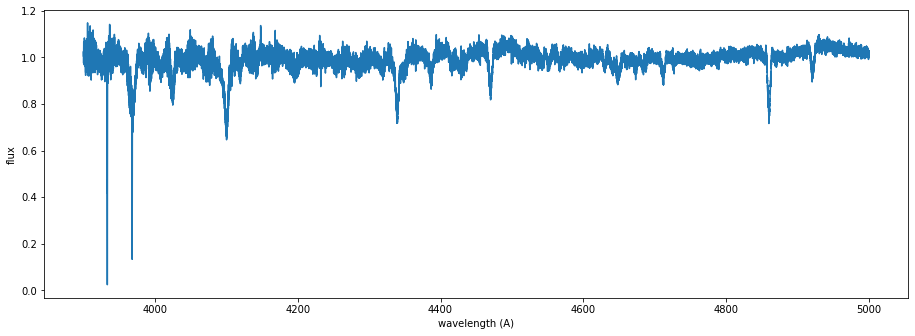

Spectra FIAd050071_step011_merge_r_n.fits
2017-04-06T05:58:06
Waveini: 3900.005240515173
Waveend: 4999.9714058276795
Resolution calculated: 0.025815953936174106 A
Resolution header: 0.02581655984492 A
Dimension array: 42608


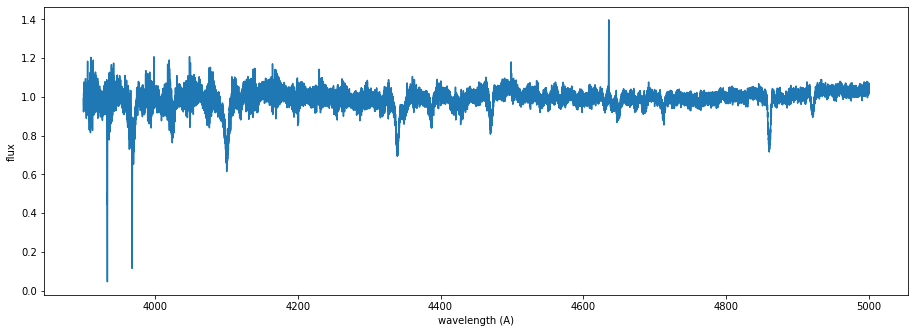

Spectra FIAd190076_step011_merge_r_n.fits
2017-04-20T05:27:16
Waveini: 3899.990425767617
Waveend: 4999.985709053729
Resolution calculated: 0.025822697856380857 A
Resolution header: 0.025823304065688 A
Dimension array: 42598


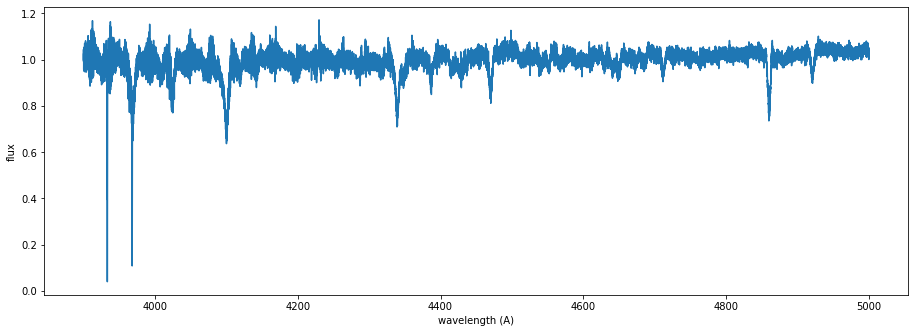

Spectra FIAe230133_step011_merge_r_n.fits
2017-05-24T02:55:22
Waveini: 3900.009616112726
Waveend: 4999.9739560692
Resolution calculated: 0.025817728904036472 A
Resolution header: 0.02581833489711 A
Dimension array: 42605


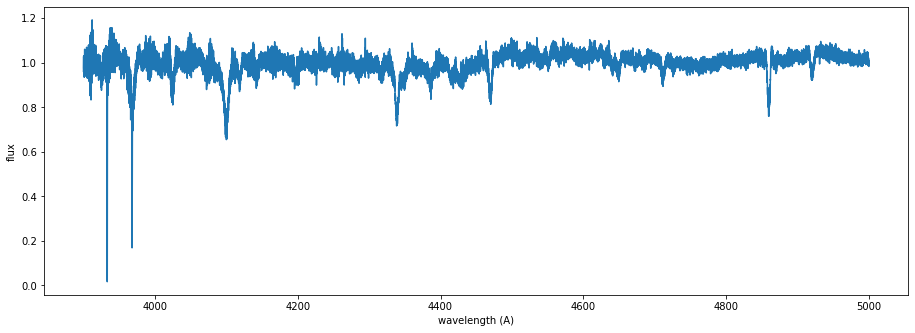

Spectra FIAd190073_step011_merge_r_n.fits
2017-04-20T04:48:22
Waveini: 3899.988866903436
Waveend: 4999.980202067595
Resolution calculated: 0.025817150589437402 A
Resolution header: 0.025817756540491 A
Dimension array: 42607


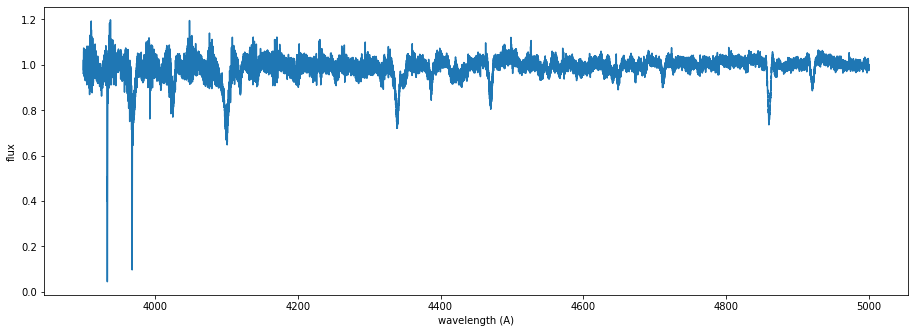

Spectra ref25000_rw_100.fits
2004-03-11T09:10:05
Waveini: 3900.0
Waveend: 4999.97
Resolution calculated: 0.009999909089256171 A
Resolution header: 0.01 A
Dimension array: 109998


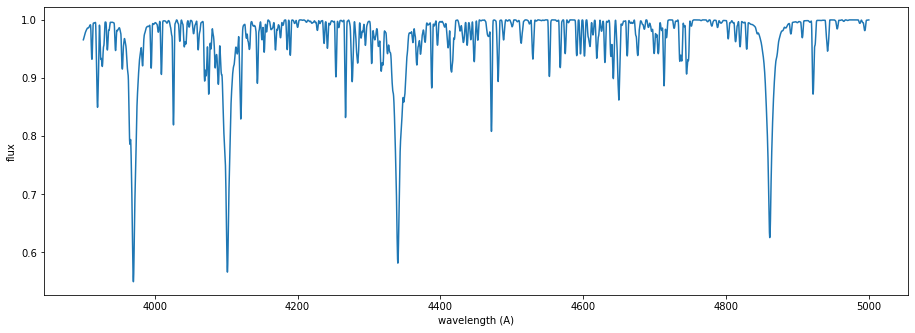

Spectra ref25000_rw_100_deg.fits
2004-03-11T09:10:05
Waveini: 3900.0
Waveend: 4999.97
Resolution calculated: 0.009999909089256171 A
Resolution header: 0.01 A
Dimension array: 109998


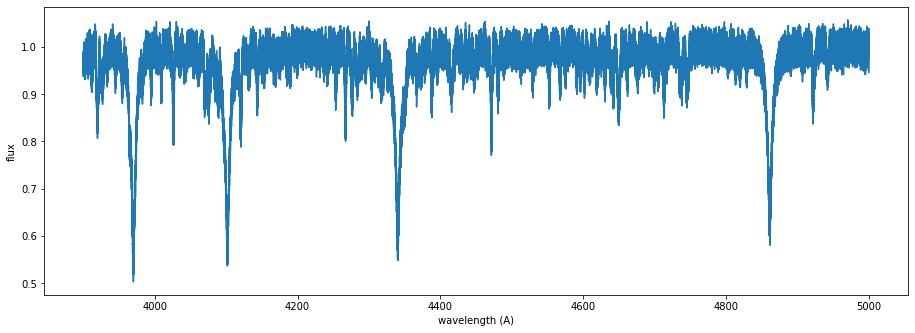

Spectra ref25000_rw_300_deg.fits
2004-03-11T09:10:05
Waveini: 3900.0
Waveend: 4999.97
Resolution calculated: 0.009999909089256171 A
Resolution header: 0.01 A
Dimension array: 109998


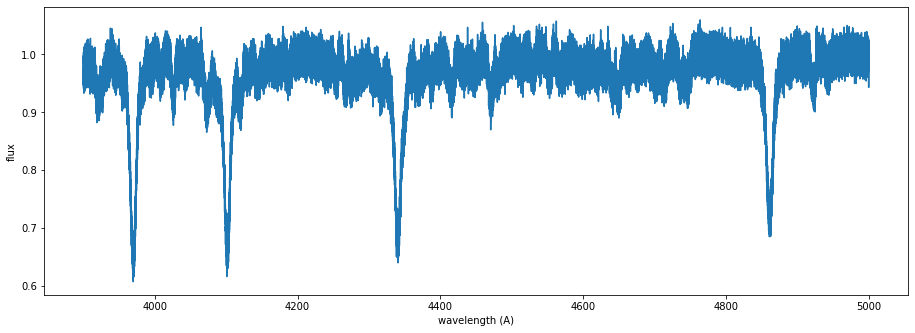

Spectra FIAe180099_step011_merge_r_n.fits
2017-05-19T03:59:41
Waveini: 3899.997899950612
Waveend: 4999.974171045288
Resolution calculated: 0.02581376774370309 A
Resolution header: 0.025814373544265 A
Dimension array: 42612


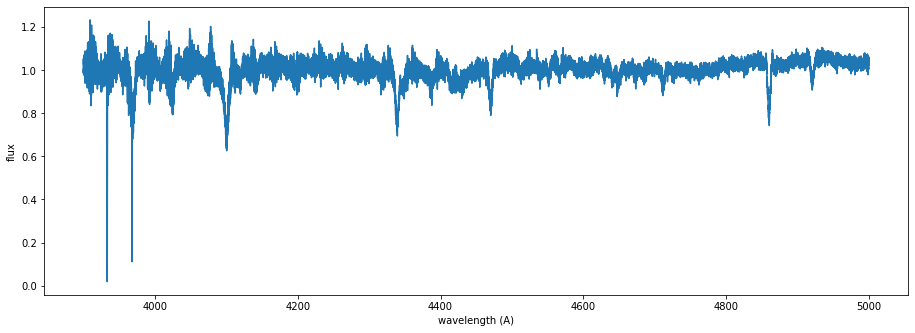

Spectra FIAe300008_step011_merge_r_n.fits
2017-05-31T05:35:56
Waveini: 3900.005361533684
Waveend: 4999.976632666178
Resolution calculated: 0.025816679680158054 A
Resolution header: 0.025817285620159 A
Dimension array: 42607


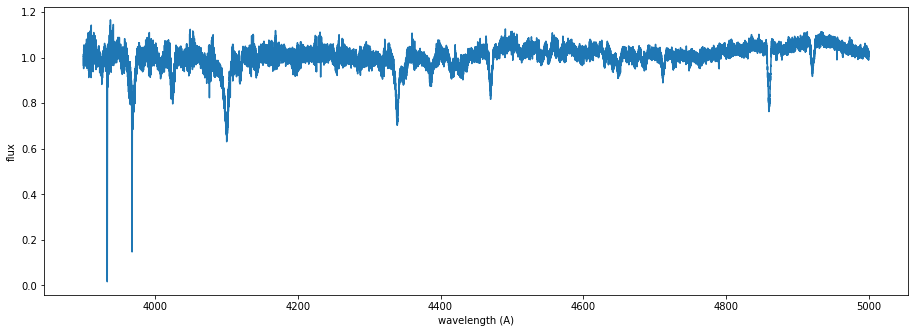

End


In [6]:
path = "/home/fran/PythonProjects/TFM/BD+532790/Normalizados_2017/"
spectra = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

#Read spectra and convert into logarithmic scale
for i in spectra:
    header, wavelength, flux, date_obs, tf = readSpec(i, path)
    print("Spectra " + i)
    print(header['DATE'])
    resolution(wavelength)
    plotSpectrum(wavelength, flux, "wavelength (A)")

print("End")
